* id - a unique identifier for each trip

* vendor_id - a code indicating the provider associated with the trip record

* pickup_datetime - date and time when the meter was engaged

* dropoff_datetime - date and time when the meter was disengaged

* passenger_count - the number of passengers in the vehicle (driver entered value)

* pickup_longitude - the longitude where the meter was engaged

* pickup_latitude - the latitude where the meter was engaged

* dropoff_longitude - the longitude where the meter was disengaged

* dropoff_latitude - the latitude where the meter was disengaged

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

* trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary Libararies

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the Datasets

In [ ]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/data/train.csv'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/data/test.csv'

try:
    df1 = pd.read_csv(file_path1)
    df2 = pd.read_csv(file_path2)
    combined_df = pd.concat([df1, df2], ignore_index=True)
except FileNotFoundError:
    print(f"Error: One or both of the files not found at the specified locations.")
except pd.errors.EmptyDataError:
    print("Error: One or both of the provided CSV files are empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
combined_df.isna()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2083773,False,False,False,True,False,False,False,False,False,False,True
2083774,False,False,False,True,False,False,False,False,False,False,True
2083775,False,False,False,True,False,False,False,False,False,False,True
2083776,False,False,False,True,False,False,False,False,False,False,True


In [ ]:
combined_df.shape

(2083778, 11)

In [ ]:
combined_df.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,625134
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
combined_df.dropna(subset=['trip_duration'], inplace=True)
combined_df['dropoff_datetime'] = pd.to_datetime(combined_df['dropoff_datetime'])

combined_df['dropoff_year'] = combined_df['dropoff_datetime'].dt.year
combined_df['dropoff_month'] = combined_df['dropoff_datetime'].dt.month
combined_df['dropoff_day'] = combined_df['dropoff_datetime'].dt.day
combined_df['dropoff_hour'] = combined_df['dropoff_datetime'].dt.hour
combined_df['dropoff_minute'] = combined_df['dropoff_datetime'].dt.minute
combined_df['dropoff_second'] = combined_df['dropoff_datetime'].dt.second

combined_df.dropna(subset=['dropoff_year', 'dropoff_month', 'dropoff_day', 'dropoff_hour', 'dropoff_minute', 'dropoff_second'], inplace=True)

In [ ]:
combined_df.shape

(1458644, 20)

In [ ]:
combined_df.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


Displays the first five rows in the dataset

In [ ]:
combined_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,2016,3,14,17,32,30
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,2016,6,12,0,54,38
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,2016,1,19,12,10,48
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,2016,4,6,19,39,40
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,2016,3,26,13,38,10


Displays the last five rows of the dataset

In [ ]:
combined_df.tail()

In [ ]:
combined_df['pickup_datetime'] = pd.to_datetime(combined_df['pickup_datetime'])

combined_df['pickup_year'] = combined_df['pickup_datetime'].dt.year
combined_df['pickup_month'] = combined_df['pickup_datetime'].dt.month
combined_df['pickup_day'] = combined_df['pickup_datetime'].dt.day
combined_df['pickup_hour'] = combined_df['pickup_datetime'].dt.hour
combined_df['pickup_minute'] = combined_df['pickup_datetime'].dt.minute
combined_df['pickup_second'] = combined_df['pickup_datetime'].dt.second

In [ ]:
combined_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,14,17,32,30,2016,3,14,17,24,55
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,12,0,54,38,2016,6,12,0,43,35
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,19,12,10,48,2016,1,19,11,35,24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,6,19,39,40,2016,4,6,19,32,31
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,26,13,38,10,2016,3,26,13,30,55


In [ ]:
combined_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dropoff_year', 'dropoff_month', 'dropoff_day',
       'dropoff_hour', 'dropoff_minute', 'dropoff_second', 'pickup_year',
       'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute',
       'pickup_second'],
      dtype='object')

In [ ]:
combined_df.drop(['pickup_datetime','dropoff_datetime','id'],axis=1,inplace=True)

In [ ]:
combined_df.head(10)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,2016,3,14,17,32,30,2016,3,14,17,24,55
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,2016,6,12,0,54,38,2016,6,12,0,43,35
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,2016,1,19,12,10,48,2016,1,19,11,35,24
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,2016,4,6,19,39,40,2016,4,6,19,32,31
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,2016,3,26,13,38,10,2016,3,26,13,30,55
5,2,6,-73.982857,40.742195,-73.992081,40.749184,N,443.0,2016,1,30,22,9,3,2016,1,30,22,1,40
6,1,4,-73.969017,40.757839,-73.957405,40.765896,N,341.0,2016,6,17,22,40,40,2016,6,17,22,34,59
7,2,1,-73.969276,40.797779,-73.922470,40.760559,N,1551.0,2016,5,21,8,20,49,2016,5,21,7,54,58
8,1,1,-73.999481,40.738400,-73.985786,40.732815,N,255.0,2016,5,27,23,16,38,2016,5,27,23,12,23
9,2,1,-73.981049,40.744339,-73.973000,40.789989,N,1225.0,2016,3,10,22,5,26,2016,3,10,21,45,1


Now find Unique categorical Values

In [ ]:
combined_df['vendor_id'].unique()

array([2, 1])

In [ ]:
combined_df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

Convert the categorical values to numerical values for ML prediction

In [ ]:
label_encoder = LabelEncoder()
combined_df['vendor_id'] = label_encoder.fit_transform(combined_df['vendor_id'])
combined_df['store_and_fwd_flag'] = label_encoder.fit_transform(combined_df['store_and_fwd_flag'])
combined_df.head(10)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455.0,2016,3,14,17,32,30,2016,3,14,17,24,55
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663.0,2016,6,12,0,54,38,2016,6,12,0,43,35
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124.0,2016,1,19,12,10,48,2016,1,19,11,35,24
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429.0,2016,4,6,19,39,40,2016,4,6,19,32,31
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435.0,2016,3,26,13,38,10,2016,3,26,13,30,55
5,1,6,-73.982857,40.742195,-73.992081,40.749184,0,443.0,2016,1,30,22,9,3,2016,1,30,22,1,40
6,0,4,-73.969017,40.757839,-73.957405,40.765896,0,341.0,2016,6,17,22,40,40,2016,6,17,22,34,59
7,1,1,-73.969276,40.797779,-73.922470,40.760559,0,1551.0,2016,5,21,8,20,49,2016,5,21,7,54,58
8,0,1,-73.999481,40.738400,-73.985786,40.732815,0,255.0,2016,5,27,23,16,38,2016,5,27,23,12,23
9,1,1,-73.981049,40.744339,-73.973000,40.789989,0,1225.0,2016,3,10,22,5,26,2016,3,10,21,45,1


Check to see if the transformation has happenned

In [ ]:
combined_df['vendor_id'].unique()

array([1, 0])

In [ ]:
combined_df['store_and_fwd_flag'].unique()

array([0, 1])

Checking to see if there are any Null Values, If yes then you need to fill them or remove them based on the data

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  int64  
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   store_and_fwd_flag  1458644 non-null  int64  
 7   trip_duration       1458644 non-null  float64
 8   dropoff_year        1458644 non-null  int32  
 9   dropoff_month       1458644 non-null  int32  
 10  dropoff_day         1458644 non-null  int32  
 11  dropoff_hour        1458644 non-null  int32  
 12  dropoff_minute      1458644 non-null  int32  
 13  dropoff_second      1458644 non-null  int32  
 14  pickup_year         1458644 non-null  int32  
 15  pickup_month        

As there are no null values check to see is there any duplicates

In [ ]:
combined_df.duplicated().sum()

7

Removing the duplicates

In [ ]:
combined_df.drop_duplicates()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455.0,2016,3,14,17,32,30,2016,3,14,17,24,55
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663.0,2016,6,12,0,54,38,2016,6,12,0,43,35
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124.0,2016,1,19,12,10,48,2016,1,19,11,35,24
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429.0,2016,4,6,19,39,40,2016,4,6,19,32,31
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435.0,2016,3,26,13,38,10,2016,3,26,13,30,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,4,-73.982201,40.745522,-73.994911,40.740170,0,778.0,2016,4,8,13,44,2,2016,4,8,13,31,4
1458640,0,1,-74.000946,40.747379,-73.970184,40.796547,0,655.0,2016,1,10,7,46,10,2016,1,10,7,35,15
1458641,1,1,-73.959129,40.768799,-74.004433,40.707371,0,764.0,2016,4,22,7,10,25,2016,4,22,6,57,41
1458642,0,1,-73.982079,40.749062,-73.974632,40.757107,0,373.0,2016,1,5,16,2,39,2016,1,5,15,56,26


Let us describe the dataset and transpose it for easy visualisation

In [ ]:
combined_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,0.534950,0.498777,0.000000,0.000000,1.000000,1.000000,1.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
store_and_fwd_flag,1458644.0,0.005515,0.074061,0.000000,0.000000,0.000000,0.000000,1.000000e+00
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06
dropoff_year,1458644.0,2016.000000,0.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
dropoff_month,1458644.0,3.517178,1.681217,1.000000,2.000000,4.000000,5.000000,7.000000e+00


In [ ]:
from scipy import stats
import numpy as np
numerical_cols = ['vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_minute', 'pickup_second', 'dropoff_year',
       'dropoff_month', 'dropoff_day', 'dropoff_hour', 'dropoff_minute',
       'dropoff_second']
z_scores = np.abs(stats.zscore(combined_df[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
combined_df_no_outliers = combined_df[~outliers]

In [ ]:
combined_df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1353765.0,0.520398,0.499584,0.000000,0.000000,1.000000,1.000000,1.000000
passenger_count,1353765.0,1.515254,1.058940,0.000000,1.000000,1.000000,2.000000,5.000000
pickup_longitude,1353765.0,-73.977814,0.025568,-74.184074,-73.992126,-73.982086,-73.968719,-73.762337
pickup_latitude,1353765.0,40.753279,0.023016,40.652294,40.738823,40.754902,40.768658,40.849525
dropoff_longitude,1353765.0,-73.975083,0.030928,-74.185242,-73.991425,-73.980072,-73.964027,-73.761520
dropoff_latitude,1353765.0,40.752628,0.028732,40.644131,40.736969,40.754841,40.769852,40.859470
store_and_fwd_flag,1353765.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trip_duration,1353765.0,786.865250,575.048961,1.000000,390.000000,643.000000,1024.000000,15617.000000
dropoff_year,1353765.0,2016.000000,0.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
dropoff_month,1353765.0,3.515767,1.680245,1.000000,2.000000,4.000000,5.000000,7.000000


In [ ]:
combined_df_no_outliers.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455.0,2016,3,14,17,32,30,2016,3,14,17,24,55
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663.0,2016,6,12,0,54,38,2016,6,12,0,43,35
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124.0,2016,1,19,12,10,48,2016,1,19,11,35,24
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429.0,2016,4,6,19,39,40,2016,4,6,19,32,31
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435.0,2016,3,26,13,38,10,2016,3,26,13,30,55


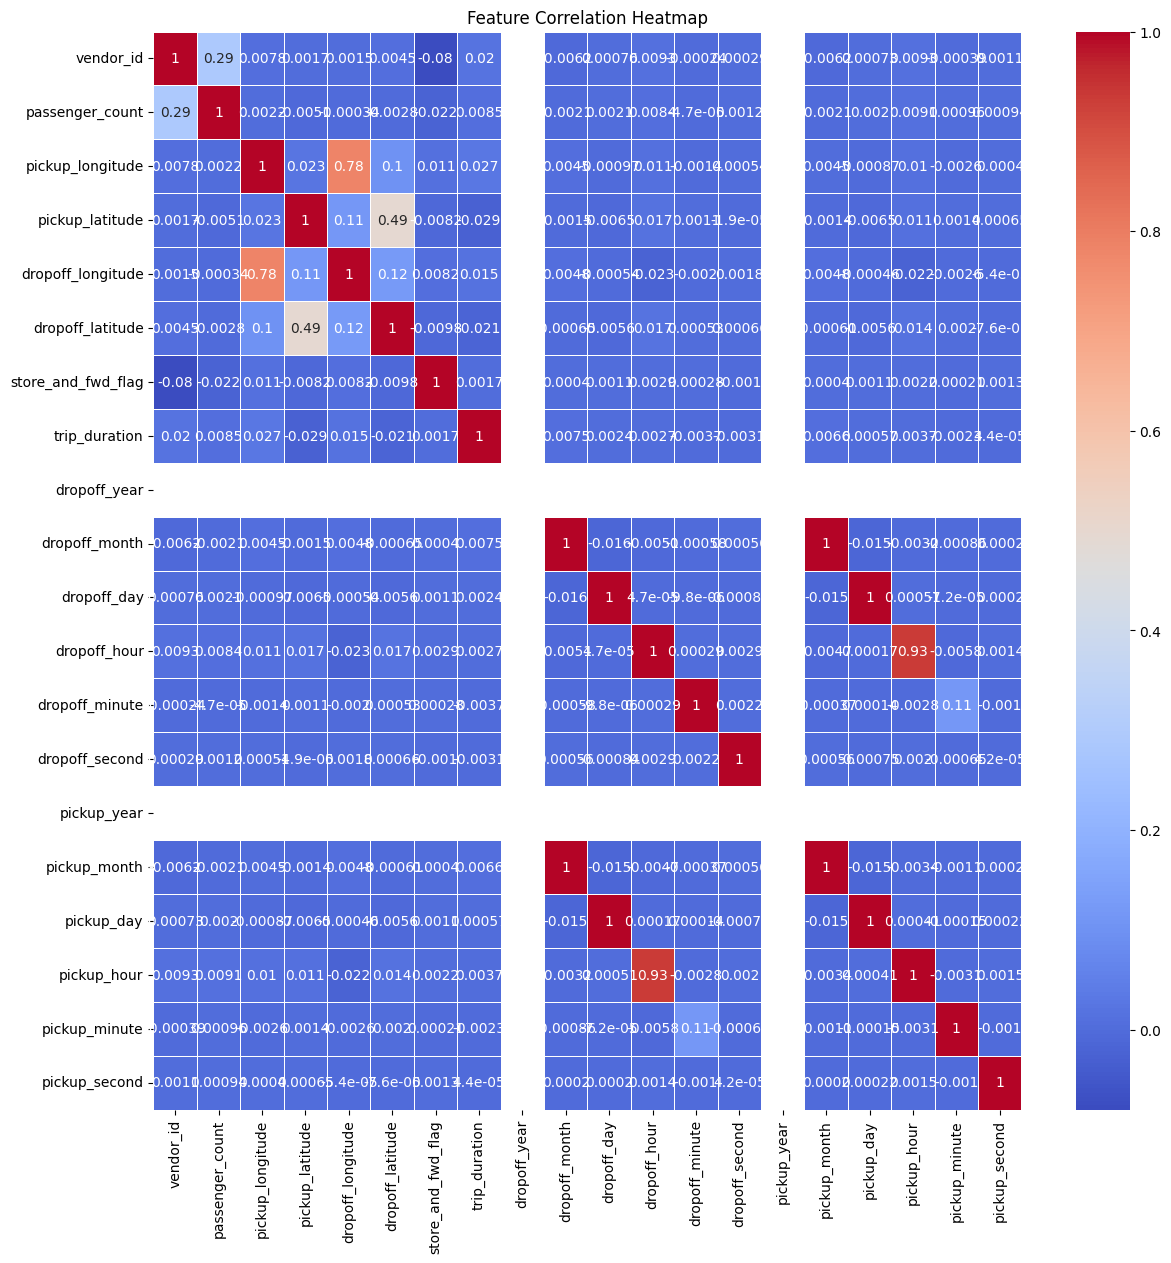

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(combined_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

X = combined_df_no_outliers.drop(columns=['trip_duration'])
y = combined_df_no_outliers['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
with open('nyc_taxi_trip_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [ ]:
with open('nyc_taxi_trip_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

predictions = loaded_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [ ]:
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 293.23
Mean Squared Error (MSE): 219243.72
Root Mean Squared Error (RMSE): 468.23
R-squared (R2): 0.3351


In [ ]:
combined_df_no_outliers.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dropoff_year', 'dropoff_month', 'dropoff_day',
       'dropoff_hour', 'dropoff_minute', 'dropoff_second', 'pickup_year',
       'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute',
       'pickup_second'],
      dtype='object')

In [ ]:
import pandas as pd
new_data = pd.DataFrame({
    'vendor_id': [1],
    'passenger_count': [2],
    'pickup_longitude': [-73.982155],
    'pickup_latitude': [40.767937],
    'dropoff_longitude': [-73.964630],
    'dropoff_latitude': [40.765602],
    'store_and_fwd_flag': [0],
    'pickup_year': [2016],
    'pickup_month': [3],
    'pickup_day': [14],
    'pickup_hour': [17],
    'pickup_minute': [24],
    'pickup_second': [55],
    'dropoff_year': [2016],
    'dropoff_month': [3],
    'dropoff_day': [14],
    'dropoff_hour': [17],
    'dropoff_minute': [32],
    'dropoff_second': [31]
})
new_data_scaled = loaded_scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data_scaled)
print(f"Predicted Trip Duration: {new_prediction[0]:.2f}")

Predicted Trip Duration: 425.28


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
